# Experimentación

## Compilado y Preparación

#### Compilamos el código de C++.

In [1]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: cannot create directory ‘build’: File exists
-- The C compiler identification is GNU 10.1.0
-- The CXX compiler identification is GNU 10.1.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc - works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ - works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /home/fyulita/.virtualenvs/scienv/bin/python (found version "3.8.3") 
-- Found PythonLibs: /usr/lib/libpython3.8.so
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/home/fyulita/Documents/UBA/2020-1C/Metodos Numericos/Material/Laboratorio/tp03
-

#### Importamos las librerías necesarias.

In [2]:
import metnum
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

!pwd
!python --version

/home/fyulita/Documents/UBA/2020-1C/Metodos Numericos/Material/Laboratorio/tp03/notebooks
Python 3.8.3


#### Importamos los datos de entrenamiento y test.

In [3]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

display(train)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,119879,bonita casas de 2 recamaras a 10 minutos del c...,vendo casa en bosques de ica residencial a 10 ...,Casa,BOSQUES,Zinacantepec,Edo. de México,0.0,2.0,2.0,...,53666.0,NaN,NaN,2015-02-08 00:00:00,0.0,0.0,0.0,0.0,0.0,650000.0
239996,259178,casa en condominio a 10 min. del centro de toluca,"casa con un jardin amplio, un cuarto de servic...",Casa,Filiberto Navas 325,Toluca,Edo. de México,0.0,3.0,3.0,...,51954.0,19.294665,-99.692916,2014-07-10 00:00:00,0.0,0.0,0.0,1.0,1.0,1940000.0
239997,131932,nicolas san juan,"departamento con excelente ubicación, muy cerc...",Apartamento,Nicolas San Juan,Benito Juárez,Distrito Federal,20.0,2.0,1.0,...,50003995.0,NaN,NaN,2015-03-03 00:00:00,0.0,0.0,0.0,0.0,0.0,3400000.0
239998,146867,casa sola. javier rojo gomez.,"casa sola, dividida en cuatro departamentos de...",Casa,Javier Rojo Gomez 120,Iztapalapa,Distrito Federal,20.0,4.0,0.0,...,24162.0,19.366651,-99.082246,2014-12-26 00:00:00,1.0,0.0,0.0,1.0,1.0,2890000.0


In [4]:
list(train.columns)

['id',
 'titulo',
 'descripcion',
 'tipodepropiedad',
 'direccion',
 'ciudad',
 'provincia',
 'antiguedad',
 'habitaciones',
 'garages',
 'banos',
 'metroscubiertos',
 'metrostotales',
 'idzona',
 'lat',
 'lng',
 'fecha',
 'gimnasio',
 'usosmultiples',
 'piscina',
 'escuelascercanas',
 'centroscomercialescercanos',
 'precio']

#### Vamos a usar K-Fold Cross Validation para evaluar tres distintas métricas en el ajuste: RMSE, RMSLE y \\( R^2 \\).

In [5]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score

def KFoldCrossValidation(K, X, y):
    # Generamos los splits.
    kfold = KFold(n_splits=K)
    kfold.get_n_splits(X)
    
    rmse = []
    rmsle = []
    r2 = []
    
    for train_index, test_index in kfold.split(X):
        # Dividimos el conjunto de datos.
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Hacemos el ajuste y predecimos.
        linearfit = metnum.LinearRegression()
        linearfit.fit(X_train, y_train)
        y_pred = linearfit.predict(X_test)
        
        # Evaluamos la prediccion con las metricas.
        rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
        rmsle.append(np.sqrt(mean_squared_log_error(y_test, y_pred)))
        r2.append(r2_score(y_test, y_pred))
    
    return [np.asarray(rmse), np.asarray(rmsle), np.asarray(r2)]

 ## Caso 1 - Metros Cubiertos vs. Precio

#### Consideremos como caso ajustar el precio en función del tamaño de la casa en metros para 100 casas del conjunto de datos.

In [6]:
# Tomo una muestra de 100 viviendas del conjunto que tengan todos los campos completos (No queremos ningún "NaN" en los datos).
seed = np.random.seed(9)
train_100 = train.dropna().sample(100, random_state=seed)

x_data = train_100["metroscubiertos"].values
y_data = train_100["precio"].values

display(train_100[["id", "metroscubiertos", "precio"]])

,id,metroscubiertos,precio
131523,96870,76.0,480000.0
50511,183695,75.0,429000.0
73589,177916,120.0,850000.0
143680,62833,60.0,400000.0
64384,98953,133.0,1080000.0
...,...,...,...
48970,234593,151.0,1550000.0
167518,263385,62.0,530000.0
221889,242479,116.0,1165000.0
148542,225427,90.0,750000.0


count    100.000000
mean     143.720000
std       79.239323
min       45.000000
25%       73.750000
50%      135.000000
75%      178.500000
max      404.000000
Name: metroscubiertos, dtype: float64

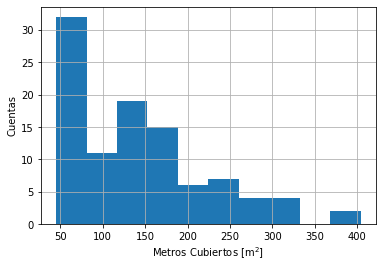

In [7]:
# Veamos un poco de info sobre los metros cubiertos de las viviendas elegidas.
display(train_100["metroscubiertos"].describe())

ax = train_100["metroscubiertos"].hist()
plt.xlabel(r"Metros Cubiertos $\left[ \mathrm{m}^2 \right]$")
plt.ylabel("Cuentas")
ax.figure.savefig("Imagenes/Histograma-Metros-Cubiertos.png")
display(ax)

count    1.000000e+02
mean     1.768893e+06
std      1.389501e+06
min      3.100000e+05
25%      7.000000e+05
50%      1.222500e+06
75%      2.464166e+06
max      5.950000e+06
Name: precio, dtype: float64

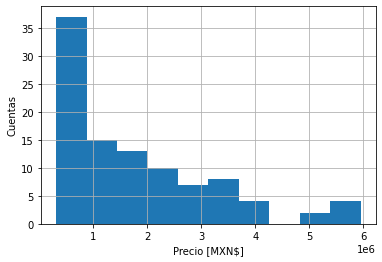

In [8]:
# Veamos un poco de info sobre los precios de las viviendas elegidas.
display(train_100["precio"].describe())

ax = train_100["precio"].hist()
plt.xlabel("Precio [MXN$]")
plt.ylabel("Cuentas")
ax.figure.savefig("Imagenes/Histograma-Precio.png")
display(ax)

In [9]:
# Ajustamos.
linearfit = metnum.LinearRegression()
linearfit.fit(x_data, y_data)

#### Ya hecho el ajuste hagamos un gráfico de los datos y del ajuste hallado para comprobar que el algoritmo funcionó correctamente.

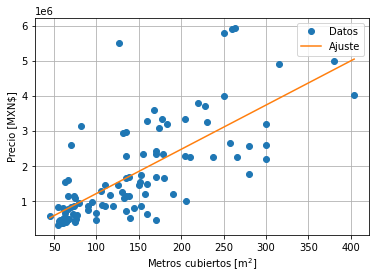

In [10]:
x_graph = np.linspace(np.min(x_data), np.max(x_data), 1000)
y_graph = linearfit.predict(x_graph)

y_graph = y_graph.reshape(y_graph.shape[0])

plt.figure("precio-metros-cubiertos")
plt.plot(x_data, y_data, "o", label="Datos")
plt.plot(x_graph, y_graph, "-", label="Ajuste")
plt.grid()
plt.legend()
plt.xlabel(r"Metros cubiertos [$\mathrm{m}^2$]")
plt.ylabel("Precio [MXN$]")
plt.savefig("Imagenes/Precio-en-Funcion-de-Metros-Cubiertos.png")
plt.show()

#### Notemos que el ajuste parece ser razonable pero claramente se ve afectado por outliers y no determina muy bien el verdadero precio de las viviendas. Veamos el RMSE y el RMSLE del ajuste.

In [11]:
K = 10

rmse, rmsle, r2 = KFoldCrossValidation(K, x_data, y_data)

print(f"RMSE = {(np.mean(rmse), np.std(rmse))}")
print(f"RMSLE = {(np.mean(rmsle), np.std(rmsle))}")
print(f"R2 = {(np.mean(r2), np.std(r2))}")

RMSE = (956637.5975146668, 230592.07014532533)
RMSLE = (0.5142346115151651, 0.11656001965256825)
R2 = (0.25153590001609283, 0.48271317729418595)


#### Notemos que el RMSE es muchísimo mayor que el RMSLE. Esto es razonable, ya que el RMSE es del orden del precio de las viviendas (de los millones de pesos) debido a los outliers. Sin embargo, el RMSLE no se ve tan afectado por outliers ya que es esencialmente el logaritmo del error relativo del ajuste; no del error absoluto.

#### Ya que tenemos un ajuste razonblemente bueno para el conjunto de datos, usémoslo para eliminar outliers y mejorar el ajuste. Veamos las distancias (euclidianas) de la predicción a cada punto y borremos todos los puntos cuya distancia sea un sigma mayor que la promedia.

In [12]:
linearfit = metnum.LinearRegression()
linearfit.fit(x_data, y_data)
y_prediction = linearfit.predict(x_data)

y_prediction = y_prediction.reshape(y_prediction.shape[0])

distances = np.abs(y_data - y_prediction)
mean_distance = np.mean(distances)
std_distance = np.std(distances)

outliers = []
x_new = []
y_new = []

for i in range(len(distances)):
    if (distances[i] < mean_distance - std_distance or distances[i] > mean_distance + std_distance):
        outliers.append(x_data[i])
    else:
        x_new.append(x_data[i])
        y_new.append(y_data[i])

x_new = np.asarray(x_new)
y_new = np.asarray(y_new)      

print(outliers)

[260.0, 300.0, 82.0, 70.0, 206.0, 66.0, 280.0, 70.0, 138.0, 135.0, 264.0, 105.0, 170.0, 250.0, 168.0, 127.0]


#### Ahora ajustemos con los nuevos datos sin outliers y veamos si el ajuste mejoró.

In [13]:
linearfit_new = metnum.LinearRegression()
linearfit_new.fit(x_new, y_new)

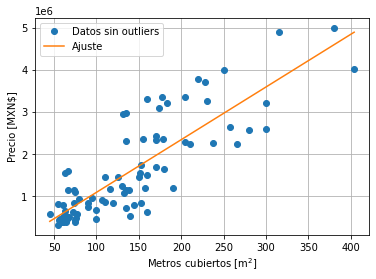

In [14]:
x_graph_new = np.linspace(np.min(x_new), np.max(x_new), 1000)
y_graph_new = linearfit_new.predict(x_graph_new)

y_graph_new = y_graph_new.reshape(y_graph_new.shape[0])

plt.figure("precio-metros-cubiertos-sin-outliers")
plt.plot(x_new, y_new, "o", label="Datos sin outliers")
plt.plot(x_graph_new, y_graph_new, "-", label="Ajuste")
plt.grid()
plt.legend()
plt.xlabel(r"Metros cubiertos [$\mathrm{m}^2$]")
plt.ylabel("Precio [MXN$]")
plt.savefig("Imagenes/Precio-en-Funcion-de-Metros-Cubiertos-sin-outliers.png")
plt.show()

#### Si comparamos este nuevo gráfico con el anterior se puede ver que este es mucho menos ruidoso y se nota que se removieron outliers. Veamos el resultado de las métricas.

In [15]:
K = 10

rmse, rmsle, r2 = KFoldCrossValidation(K, x_new, y_new)

print(f"RMSE = {(np.mean(rmse), np.std(rmse))}")
print(f"RMSLE = {(np.mean(rmsle), np.std(rmsle))}")
print(f"R2 = {(np.mean(r2), np.std(r2))}")

RMSE = (622985.3863927175, 166390.4866400043)
RMSLE = (0.4195674858871298, 0.0733411250374688)
R2 = (0.6031945970803357, 0.17734940917481332)


#### Estos errores son notablemente menores que los anteriores.

## Caso 2 - Latitud y Longitud vs. Precio

#### Veamos ahora cómo el precio varía dependiendo de la ubicación de la vivienda. Para eso vamos a usar la latitud y longitud y vamos a ajustar el precio a esas variables.

In [16]:
# Tomo una muestra de 500 viviendas del conjunto que tengan todos los campos completos (No queremos ningún "NaN" en los datos).
# Elijo un seed ya que la imagen de fondo en el grafico esta elegida para cierto rango de latitudes y longitudes.
# El numero 6 lo saque de tirar un dado, te lo juro ;)
seed = np.random.seed(6)
train_500 = train.dropna().sample(500, random_state=seed)

deberian_ser_nan = list(set(train_500.index[train_500["lng"] == 0.0].tolist() + train_500.index[train_500["lat"] == 0.0].tolist()))
train_500 = train_500.drop(labels=deberian_ser_nan, axis=0)

x_data = train_500[["lng", "lat"]].values
y_data = train_500["precio"].values

display(train_500[["id", "lng", "lat", "precio"]])

,id,lng,lat,precio
200798,228260,-98.285556,18.981585,2320000.0
220758,267456,-99.174928,19.362644,4195000.0
84876,41117,-101.052533,22.160978,1550000.0
199046,62538,-99.244690,19.569223,2000000.0
58916,59684,-98.352682,19.113104,1190000.0
...,...,...,...,...
164978,262627,-99.203004,18.799797,1400000.0
18277,287722,-101.721489,21.156781,1700000.0
230810,168217,-99.081923,19.614459,2500000.0
60594,93244,-103.427256,20.609078,1200000.0


In [17]:
print("Rango de Longitud:", (np.min(x_data[:, 0]), np.max(x_data[:, 0])))
print("Rango de Latitud:", (np.min(x_data[:, 1]), np.max(x_data[:, 1])))

Rango de Longitud: (-117.05260661090084, -86.82080286794434)
Rango de Latitud: (16.734008226454566, 32.5864807)


In [18]:
ajuste = metnum.LinearRegression()
ajuste.fit(x_data, y_data)

In [19]:
'''

Creamos una cuadrilla de 1000x1000 valores de latitud y longitud entre el mínimo y el máximo.

Por ejemplo, supongamos que lng = [0, 1, 2] y lat = [0, 1, 2]. Entonces:

LNG = [
    [0, 1, 2],
    [0, 1, 2],
    [0, 1, 2]
]

LAT = [
    [0, 0, 0],
    [1, 1, 1],
    [2, 2, 2]
]

Lo que queremos entonces es usar el ajuste para obtener otra cuadrilla:

y = [
    [f(0, 0), f(1, 0), f(2, 0)],
    [f(0, 1), f(1, 1), f(2, 1)],
    [f(0, 2), f(1, 2), f(2, 2)]
]

donde f(lng, lat) es la función que ajustamos.

'''

lng_graph = np.linspace(np.min(x_data[:, 0]), np.max(x_data[:, 0]), 1000)
lat_graph = np.linspace(np.min(x_data[:, 1]), np.max(x_data[:, 1]), 1000)
LNG_graph, LAT_graph = np.meshgrid(lng_graph, lat_graph)

y_graph = []
for i in range(LNG_graph.shape[0]):
    lng_lat_row = np.column_stack([LNG_graph[i], LAT_graph[i]])
    y_row = ajuste.predict(lng_lat_row)
    y_row = y_row.reshape(y_row.shape[0])
    y_graph.append(y_row)
y_graph = np.asarray(y_graph)

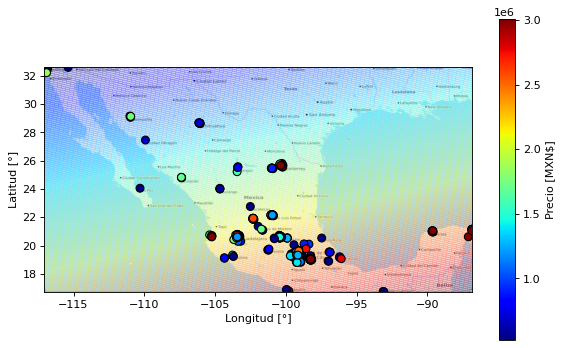

In [20]:
from matplotlib.colors import Normalize

mi = np.min(y_graph)
ma = np.max(y_graph)
norm = Normalize(vmin=mi,vmax=ma)

# El mapa lo saqué de openstreetmap.com.
mexico = plt.imread("Imagenes/mapa_mexico.png")
BBox = (np.min(x_data[:, 0]), np.max(x_data[:, 0]), np.min(x_data[:, 1]), np.max(x_data[:, 1]))

plt.figure(2, figsize=(690 / 80, 425 / 80), dpi=80)
plt.imshow(mexico, extent=BBox, aspect='equal', alpha=1)
plt.contourf(LNG_graph, LAT_graph, y_graph, 200, alpha=0.2, norm=norm, cmap="jet")
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data, s=50, norm=norm, cmap="jet", edgecolor="k")
plt.colorbar().set_label("Precio [MXN$]")
plt.xlabel("Longitud [°]")
plt.ylabel("Latitud [°]")
plt.savefig("Imagenes/Precio-de-Viviendas-por-Ubicacion.png")
plt.show()

#### Notemos que la linealidad del ajuste se refleja en la linealidad del gradiente de colores de fondo que representa la predicción para cada punto del mapa. Según este ajuste las viviendas más caras se encuentran en la costa sur del atlántico. Esta costa es la del caribe, por lo tanto el resultado es razonable. Sin embargo, al ser un ajuste lineal no hay mucha más información que podamos sacar al respecto ya que no puede dividir por zonas.

#### Veamos los errores.

In [21]:
y_prediction = ajuste.predict(x_data)
y_prediction = y_prediction.reshape(y_prediction.shape[0])

rmse = RMSE(y_data, y_prediction)
rmsle = RMSLE(y_data, y_prediction)

print("RMSE =", rmse)
print("RMSLE =", rmsle)

NameError: name 'RMSE' is not defined

### K-Fold Cross Validation

In [ ]:
trainC = train.dropna()
x_cross = trainC[["lng", "lat"]].values


y_cross = trainC["precio"].values
kf = KFold(n_splits=5)
#kf.get_n_splits(x_data)
RMSE_array = np.array([])
RMSLE_array = np.array([])
for train_index, test_index in kf.split(x_cross):
    x_ctrain = x_cross[train_index]
    y_ctrain = y_cross[train_index]
    x_ctest = x_cross[test_index]
    y_ctest = y_cross[test_index]
    
    ajusteC = metnum.LinearRegression()
    ajusteC.fit(x_ctrain, y_ctrain)
    predictC = ajusteC.predict(x_ctest)
    predictC = predictC.reshape(predictC.shape[0])
    rmse = RMSE(y_ctest, predictC)

    negativos = np.argwhere(predictC<0)

    y_ctest = np.delete(y_ctest, np.argwhere(predictC<0))
    predictC = np.delete(predictC, np.argwhere(predictC<0))
    rmsle = RMSLE(y_ctest, predictC)
    RMSE_array  = np.append(RMSE_array,rmse)
    RMSLE_array  = np.append(RMSLE_array, rmsle)
###print(RMSE_array)
print("Promedio y varianza del error para el caso lineal" )    
print("RMSE-> Promedio: ", np.mean(RMSE_array) ,"Varianza: " , np.sqrt(np.var(RMSE_array)))
print("RMSLE-> Promedio: ", np.mean(RMSLE_array), "Varianza: " , np.sqrt(np.var(RMSLE_array)))


## Caso 3: Precios de Viviendas en Cancún

#### Estudiemos ahora los precios por ubicación pero segmentando a sólo las viviendas en Cancún y permitámosle al ajuste tomar un orden más de libertad para cada variable.

In [ ]:
print("Provincias:", train.provincia.unique())

QuintanaRoo = train[train["provincia"] == "Quintana Roo"]
print("Ciudades de Quintana Roo:", QuintanaRoo.ciudad.unique())

In [ ]:
cancun = train[train["ciudad"] == "Cancún"].dropna()

In [ ]:
# Defino los límites a mano para obtener viviendas en la zona más poblada de Cancún.
outliers = list(set(cancun.index[cancun["lng"] > -86.74].tolist() +
                    cancun.index[cancun["lng"] < -86.92].tolist() +
                    cancun.index[cancun["lat"] > 21.20].tolist() +
                    cancun.index[cancun["lat"] < 21.05].tolist()))
cancun = cancun.drop(labels=outliers, axis=0)
display(cancun)

In [ ]:
# Son muchas viviendas, tomemos una muestra de 200 del conjunto.
seed = np.random.seed(6)
cancun = cancun.sample(200, random_state=seed)

In [ ]:
x_data = cancun[["lng", "lat"]].values
y_data = cancun["precio"].values

In [ ]:
# El mapa lo saqué de openstreetmap.com.
mapa_cancun = plt.imread("Imagenes/mapa_cancun.png")
BBox = (-86.92, -86.74, 21.05, 21.20)

plt.figure(3, figsize=(526 / 80, 470 / 80), dpi=80)
plt.imshow(mapa_cancun, extent=BBox, aspect='equal', alpha=1)
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data, s=50, cmap="jet", edgecolor="k")
plt.colorbar().set_label("Precio [MXN$]")
plt.xlabel("Longitud [°]")
plt.ylabel("Latitud [°]")
plt.savefig("Imagenes/Precio-de-Viviendas-de-Cancun.png")
plt.show()

In [ ]:
# Agrego lng^2, lng * lat y lat^2 a las variables del ajuste.
x_fit = np.column_stack([x_data, x_data[:, 0] ** 2, x_data[:, 0] * x_data[:, 1], x_data[:, 1] ** 2])
y_fit = y_data

In [ ]:
ajuste = metnum.LinearRegression()
ajuste.fit(x_fit, y_fit)

In [ ]:
lng_graph = np.linspace(-86.92, -86.74, 1000)
lat_graph = np.linspace(21.05, 21.20, 1000)
LNG_graph, LAT_graph = np.meshgrid(lng_graph, lat_graph)

y_graph = []
for i in range(LNG_graph.shape[0]):
    rows = np.column_stack([LNG_graph[i], LAT_graph[i], LNG_graph[i] ** 2, LNG_graph[i] * LAT_graph[i], LAT_graph[i] ** 2])
    y_row = ajuste.predict(rows)
    y_row = y_row.reshape(y_row.shape[0])
    y_graph.append(y_row)
y_graph = np.asarray(y_graph)

In [ ]:
mi = np.min(y_graph)
ma = np.max(y_graph)
norm = Normalize(vmin=mi,vmax=ma)

plt.figure(4, figsize=(526 / 80, 470 / 80), dpi=80)
plt.imshow(mapa_cancun, extent=BBox, aspect='equal', alpha=1)
plt.contourf(LNG_graph, LAT_graph, y_graph, 200, alpha=0.2, norm=norm, cmap="jet")
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data, s=50, norm=norm, cmap="jet", edgecolor="k")
plt.colorbar().set_label("Precio [MXN$]")
plt.xlabel("Longitud [°]")
plt.ylabel("Latitud [°]")
plt.savefig("Imagenes/Precio-de-Viviendas-en-Cancun-(ConAjuste).png")
plt.show()

#### Notemos que como era esperable las viviendas cercanas a la costa son más caras que las alejadas de la costa. Se puede comprobar usando los puntos de la muestra que el ajuste es correcto.

In [ ]:
y_prediction = ajuste.predict(x_fit)
y_prediction = y_prediction.reshape(y_prediction.shape[0])

# Por algun motivo hay un elemento negativo (solo uno :/)
y_prediction= np.abs(y_prediction)        

rmse = RMSE(y_fit, y_prediction)
rmsle = RMSLE(y_fit, y_prediction)

print("RMSE =", rmse)
print("RMSLE =", rmsle)

### K-Fold Cross Validation

#### Voy a agregar el método lineal para ver la diferencia en los errores con el cuadrático utilizado.

#### Hago una función para dejar de copiar y pegar que ya estaba quedando re feo.

In [ ]:
###Defino una funcion 
def K_fold(x_cross,y_cross , k):
    kf = KFold(n_splits=k)
    #kf.get_n_splits(x_data)
    RMSE_array = np.array([])
    RMSLE_array = np.array([])
    for train_index, test_index in kf.split(x_cross):
        x_ctrain = x_cross[train_index]
        y_ctrain = y_cross[train_index]
        x_ctest = x_cross[test_index]
        y_ctest = y_cross[test_index]

        ajusteC = metnum.LinearRegression()
        ajusteC.fit(x_ctrain, y_ctrain)
        predictC = ajusteC.predict(x_ctest)
        predictC = predictC.reshape(predictC.shape[0])
        rmse = RMSE(y_ctest, predictC)

        negativos = np.argwhere(predictC<0)

        y_ctest = np.delete(y_ctest, np.argwhere(predictC<0))
        predictC = np.delete(predictC, np.argwhere(predictC<0))
        rmsle = RMSLE(y_ctest, predictC)
        RMSE_array  = np.append(RMSE_array,rmse)
        RMSLE_array  = np.append(RMSLE_array, rmsle)
    ###print(RMSE_array)
    
    print("RMSE-> Promedio: ", np.mean(RMSE_array) ,"Varianza: " , np.sqrt(np.var(RMSE_array)))
    print("RMSLE-> Promedio: ", np.mean(RMSLE_array), "Varianza: " , np.sqrt(np.var(RMSLE_array)))

    


In [ ]:
trainC = train.dropna()
cancun = trainC[trainC["ciudad"] == "Cancún"].dropna()
cancun = cancun.drop(labels=outliers, axis=0) ### la unica diferencia es que no hago lo redusco a 200 elementos después 

x_cross = trainC[["lng", "lat"]].values
y_cross = trainC["precio"].values
print("Error para aproximacion lineal")
K_fold(x_cross,y_cross , 5)
x_cross  = np.column_stack([x_cross, x_cross[:, 0] ** 2, x_cross[:, 0] * x_cross[:, 1], x_cross[:, 1] ** 2])
print("Error para aproximacion cuadratica")

K_fold(x_cross,y_cross,5)


## Análisis de las descripciones

#### Voy a analizar la aparición de palabras "positivas" en las descripciones y observar el resultado al agregarlo como dato en nuestras aproximaciones anteriores.

In [ ]:
list(train.columns)
display(train["descripcion"][500])


#### Esta es la lista de palabras que buscaremos

In [ ]:
positivas = ["hospital", "escuela" , "colegio" , "luminoso", "espaciado" , "estacionamiento", "espacioso" , "bonito" , "tranquilidad" , "preciosa" , "precioso" ]

In [ ]:
def comentarios(entrenar):
    listaP = np.array([])
    trainP = entrenar.dropna()
    for descripcion in (trainP["descripcion"]):
        totales = 0;
        for palabra in positivas:
            if(palabra in descripcion):
                totales += 1      
        listaP = np.append(listaP, totales)
    return listaP
listaP = comentarios(train)

#### agrego al la cuentas hechas anteriormente par ala latitud y longitud estos datos de forma lineales

In [ ]:
trainC = train.dropna()
cancun = trainC[trainC["ciudad"] == "Cancún"].dropna()
cancun = cancun.drop(labels=outliers, axis=0) ### la unica diferencia es que no hago lo redusco a 200 elementos después 

x_cross = trainC[["lng", "lat"]].values
x_cross = np.column_stack([x_cross, listaP])
y_cross = trainC["precio"].values
print("Error para aproximacion lineal con la lista de descripciones positivas")
K_fold(x_cross,y_cross,5)
###ver que x_cross ya tenia el listaP
x_cross  = np.column_stack([x_cross, x_cross[:, 0] ** 2, x_cross[:, 0] * x_cross[:, 1], x_cross[:, 1] ** 2])
y_cross = trainC["precio"].values

print("Error para aproximacion cuadratica con la lista de descripciones positivas")
K_fold(x_cross,y_cross,5)


## Se necesita agragar una caractiristica más que se quiera modelar que no se precios
#### Voy a observar los metros cubiertos ,utilizando la misma metodologia anterior.
#### En primer lugar utilizando voy a comprarlo con la cantidad de habitaciones y baños

In [ ]:
train100 = train.dropna().sample(100, random_state = seed)

In [ ]:
y_data100 = train100["metroscubiertos"] 
x_data100 = train100["habitaciones"] + train100["banos"] 

In [ ]:

ajuste = metnum.LinearRegression()
ajuste.fit(x_data100 , y_data100)

In [ ]:
x_graph = np.linspace(np.min(x_data100), np.max(x_data100), 1000)
y_graph = ajuste.predict(x_graph)

y_graph = y_graph.reshape(y_graph.shape[0])

plt.figure(5)
plt.title("Metros cubiertos en función de la cantidad de habitaciones y baños")
plt.plot(x_data100, y_data100, "o", label="Datos")
plt.plot(x_graph, y_graph, "-", label="Ajuste")
plt.grid()
plt.legend()
plt.xlabel("#Habitaciones + #Baños")
plt.ylabel(r"Metros cubiertos [$\mathrm{m}^2$]")
plt.show()

#### Si bien se puede osbervar que a más cantidad de habitaciones y baños más son los metros cubiertos esta es muy variable y el ajuste no sirve

#### Veamos que sucede si miramos a los datos agregamos los garages gimnasios y usos multiples

In [ ]:
y_data100 = train100["metroscubiertos"] 
x_data100 = train100["habitaciones"] + train100["banos"] +  train100["garages"]
print(x_data100.shape)

ajuste = metnum.LinearRegression()
ajuste.fit(x_data100 , y_data100)
x_graph = np.linspace(np.min(x_data100), np.max(x_data100), 1000)
y_graph = ajuste.predict(x_graph)

y_graph = y_graph.reshape(y_graph.shape[0])

plt.figure(6)
plt.title("Metros cubiertos en función de la cantidad de habitaciones y baños")
plt.plot(x_data100, y_data100, "o", label="Datos")
plt.plot(x_graph, y_graph, "-", label="Ajuste")
plt.grid()
plt.legend()
plt.xlabel("#Habitaciones + #Baños + #garage ")
plt.ylabel(r"Metros cubiertos [$\mathrm{m}^2$]")
plt.savefig("Imagenes/Mcubiertos#Habit+B+g.png")

plt.show()

In [ ]:
####Veamos que pasa si solo miro los de una ciudad en especifico

In [ ]:
cancun = train[train["ciudad"] == "Cancún"].dropna().sample(100)


### Que pasa si le agregamos que observe las descripciones ya que estoy auqnue no deberia cambiar nada solo para tener un feature engenier más

In [ ]:
z_comentarios = comentarios(cancun)
x_data100 = cancun["habitaciones"] + cancun["banos"] +  cancun["garages"] 
x_basico = x_data100
##x_data100 = np.column_stack([x_data100, z_comentarios])
print((x_data100.shape))

ajusteC = metnum.LinearRegression()
ajusteC.fit(x_data100, y_data100)
x_graph = np.linspace(np.min(x_basico), np.max(x_basico), 1000)
y_graph = ajuste.predict(x_graph)

y_graph = y_graph.reshape(y_graph.shape[0])

plt.figure(7)
plt.title("Metros cubiertos en función de la cantidad de habitaciones y baños")
plt.plot(x_basico, y_data100, "o", label="Datos")
plt.plot(x_graph, y_graph, "-", label="Ajuste")
plt.grid()
plt.legend()
plt.xlabel("#Habitaciones + #Baños + #garage ")
plt.ylabel(r"Metros cubiertos [$\mathrm{m}^2$]")
plt.show()

#### No se obserba una correlacion muy distinta de lo observado anteriormente

#### No se observa demasiado como con la primera de metros cubierto vs precio pero creo que basta para responder a lo pedido , nomas decir que error tiene  , quedo masomenos safable el primero y el segundo

## Veamos como queda el error K fold de los metros cubiertos en función de #habitaciones + #baños + # garages 

In [ ]:
trainC = train.dropna()
x_dataC = trainC["habitaciones"].values + trainC["banos"].values
y_dataC = trainC["metroscubiertos"].values
print("Metros cubiertos en funcion del número de habitaciones y baños ")
K_fold(x_dataC,y_dataC,10)
x_dataC = trainC["habitaciones"].values + trainC["banos"].values + trainC["garages"].values
y_dataC = trainC["metroscubiertos"].values
print("Metros cubiertos en funcion del número de habitaciones, garages y baños ")
K_fold(x_dataC,y_dataC,10)

metrost = trainC["metrostotales"]
com = comentarios(trainC)
print("Metros cubiertos en funcion de tres variables lineales , metrostotales , numero de baños habitacioes y garages")
x_dataC = np.column_stack([x_dataC,metrost ])
K_fold(x_dataC,y_dataC,10)
print("Agrego comentarios positivos como variable")
x_dataC = np.column_stack([x_dataC,com ])
K_fold(x_dataC,y_dataC,10)



#### Se puede observar una disminucion en el valor del error al agregar los metros totales.


In [ ]:
z_data100 = train100["metroscubiertos"] 
x_data100 = train100["habitaciones"] + train100["banos"] +  train100["garages"]
y_data100 = train100["metrostotales"]
ajustedata = np.column_stack([x_data100,y_data100])
ajuste = metnum.LinearRegression()
ajuste.fit(ajustedata , y_data100)
x_graph = np.linspace(np.min(x_data100), np.max(x_data100), 1000)
y_graph = np.linspace(np.min(y_data100), np.max(y_data100), 1000)

z_graph = ajuste.predict(np.column_stack([x_graph,y_graph]))

#z_graph = z_graph.reshape(z_graph.shape[0])


In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.title("Metros cubiertos en función de la cantidad de habitaciones y los metros totales")

ax.scatter3D(x_data100, y_data100, z_data100, c=z_data100, cmap='viridis')
ax.scatter3D(x_graph, y_graph, z_graph, c=z_graph, cmap='viridis' )
ax.set_xlabel('#cuartos')
ax.set_ylabel('Metros totales')
ax.set_zlabel('Metros cubiertos')
plt.savefig("Imagenes/Mcubiertos_MeTotales#hab.png")

ax.view_init(20, 5)